# Prediction of movie genres by plot summary

## I. Introduction
### 1. Domain-specific area
In this work we are going to consider the problem of prediction of a movie genres by its plot summary. Each movie may have a few genres, so the problem can be described as given a plot summary, predict a set of genres. From the point of NLP that task can be considered as a **Multiclass text classification** (if we consider each possible genre combination as a separate class) or as a **Multilabel text classification** (if we consider an each genre as a separate class). In this work we are considering an approach with **Multilabel test classification**, because **Multiclass text classification** does not provide much flexibility and it is not possible to have each possible genre combination in a training dataset.

The task was previously considered in many articles, but not all the challenges were addressed. Usually a preprocessing step is quite minimal and an evaluation is not always correct (for example, using accuracy as is for evaluation of **Multilabel text classification**).

Using modern advanced languages models like **BERT** or **GPT** allows to minimize the preprocessing step and even almost avoid it, but in this work we are going to consider more classical approaches like Word2Vec (Doc2Vec) for 2 reasons:
1. Existing articles on genre classification mostly use TFIDF or Word2Vec. And in this work we will try to compare performance using the same or similar text vectorization approach but with more detailed preprocessing step to show importance of the text preprocessing.
2. In this work we are aimed aldo to demonstrate concrete text preprocessing techniques which is not required when using BERT or GPT.

The challenges may be:
1. There is always a bit of randomnes in assigning genres to a movies, because it is done by people who have different cultural background, life experince and so on. For example, the same title for different people can be Anime, Cartoon or both. Also there is always a global cultural context. For example the word "Batman" can be considered as a feature of Action genre or as a feature of Sci-Fi genre depending on the depth of immersion in the global context.
2. The genre prediction is a Multilabel classification task. It means classes are not mutually exclusive and a movie can have several classes. That requires additional preprocessing step, special classifiers and non-standard evaluation approach.
3. There are no full datasets legally available. Public datasets are usually small (not more than 30-40 thousands of summaries). If we want the fullest dataset we need to use webscraping and face the legal consequences.
4. The task can be similar to sentiment analysis task, but there are some differences, for example, sometemies proper nouns should be considered separately to make a link between genres.

Useful contributions can be:
1. Film industry (automatic genre prediction for producers, writers, copyrighters, movie catalogues sites)
2. News resources (autonatic genre prediction for articles about movies)

### 2. Objectives
The following obejctives are identified:
1. Aquire a big enough plot summaries dataset.
2. Find articles considering similar problem to use for comparison as baseline performance.
3. Find a correct way for preprocessing and vectorizing summary texts.
4. Find a correct classfication approach, implement and run it.
5. Build required metrics, evaluate classification and compare performance with baseline references.

### 3. Dataset
This work requires dataset with movies genres and movies plot summaries. There are such datasets ovet the Internet, but usually they are cut and incomplete. So this work includes the process of acquiring requred dataset consisting of several steps.

IMDb is chosen as the main source of data as it has one of the most complete sets of data about movies. There is a dataset available for personal non-commercial usage [[1]](#1)[[2]](#2) but it does not have plot summaries. Plot summaries can be acquired only by web-scraping from movie summary pages [[3]](#3).

The steps required for aqcuiring required dataset are the following:
1. Download official IMDB movie dataset with genres [[2]](#2). Each row contains info about movie IMDB id, title, genres and so on. We will need only the following columns:
    - tconst - unique string identifier of a movie
    - titleType - categorical string, represents title type (e.g. movie, tv series, show, etc.)
    - originalTitle - string, movie title
    - genres - string, comma separated list of genres
    The dataset has almost 600.000 rows.
2. Scrape plot summaries from IMDB plot summary page [[3]](#3) for each movie from the official IMDB dataset above. Each movie may have a few summaries. After the scraping we will have the dataset with the following columns:
    - tconst - unique string identifier of a movie
    - Summary - string, movie summary
    Not all the movies have plot summaries. At the result the dataset has about 480.000 summaries, 
3. Merge 2 dataset above to a single dataset with the following columns: 
    - Id - unique string identifier of a movie
    - Title - string, movie title
    - Genres - string array, list of genres
    - Summary - string, movie summary
    The dataset has about 480.000 rows.

### 4. Evaluation methodology
When choosing evaluation metrics in this work, the wollowing factors were considered:
1. Metrics should used in other similar projects to have something to compare.
2. There should not be options when metrics has a high value for in fact a bad model.
3. Metrics should reflect the multi-label classification approach correctly.

At the result the metrics chosen are:
1. **Accuracy** - (TP + TN) / (TP + TN + FP + FN). Not expected to be high for multi-label classification. Used just for comparison with other baselines.
2. **Hamming Loss** - the fraction of labels that are incorrectly predicted. Can be used as a forgiving version of accuracy for multi-label classification. Less is better.
3. **Precision-micro** - TP / (TP + FP). Shows the ability of the classifier not to label as positive a sample that is negative. Micro- version is calculated globally by counting the total TP and FP. This is a better metric when we have class imbalance.
4. **Recall-micro** - TP / (TP + FN). Shows the ability of the classifier to find all the positive samples. Micro- version is calculated globally by counting the total TP and FN. This is a better metric when we have class imbalance.
5. **F1-micro** - 2 * (Precision * Recall) / (Precision + Recall). Can be interpreted as a harmonic mean of the precision and recall. Micro- version is calculated globally by counting the total TP, FN and FP This is a better metric when we have class imbalance.
6. **Precision-macro** - TP / (TP + FP). Shows the ability of the classifier not to label as positive a sample that is negative. In macro- version the metrics is calculated for each label separately, then theirs unweighted mean gives the final result. This does not take label imbalance into account.
7. **Recall-macro** - TP / (TP + FN). Shows the ability of the classifier to find all the positive samples. In macro- version the metrics is calculated for each label separately, then theirs unweighted mean gives the final result. This does not take label imbalance into account.
8. **F1-macro** - 2 * (Precision * Recall) / (Precision + Recall). Can be interpreted as a harmonic mean of the precision and recall. In macro- version the metrics is calculated for each label separately, then theirs unweighted mean gives the final result. This does not take label imbalance into account.

The metrics are considered in the global prediction context and per a genre.

## II. Implementation

The project data are uploaded to Google Drive storage and can be downloaded by the sharing link [[14]](#14).
Scheme of the data folder:
 1. /data/raw/title.basics.tsv - Movie dataset from IMDB [[2]](#2).
 2. /data/scraped/summaries.csv - Plot summaries scraped from IMDB.
 3. /data/prepared/movies.csv - Merged dataset with movie genres and summaries.
 4. /data/models/doc2vec - Doc2Vec models for different vector sizes.
 5. /data/models/mlp.pickle - Final MLP-classifier.
 6. /data/preprocessed/binarization_classes.csv - CSV for inverse genres binarization.
 7. /data/preprocessed/train.pickle - Vectorized training dataset.
 8. /data/preprocessed/test.pickle - Vectorized testing dataset.

Let's start with installing required dependencies and configuring widgets

In [ ]:
!pip install wheel matplotlib pandas numpy bs4 asyncio aiohttp aiohttp-retry tqdm aiofiles aiocsv ipywidgets jupyter_contrib_nbextensions contractions nltk svgling pandarallel scikit-learn gensim seaborn

In [ ]:
import sys
!{sys.executable} -m jupyter nbextension enable --py widgetsnbextension

Now let's add required imports and configure display options

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.tokenize import NLTKWordTokenizer, WordPunctTokenizer
from nltk.sentiment.util import mark_negation
from nltk.stem import WordNetLemmatizer
from nltk import sent_tokenize
from nltk.corpus import wordnet

from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.models.callbacks import CallbackAny2Vec

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, f1_score, accuracy_score, \
    hamming_loss, classification_report, confusion_matrix, \
    precision_score, recall_score, multilabel_confusion_matrix, \
    ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier

import asyncio
import aiohttp
import aiofiles
import csv
import json
import contractions
import string
from aiocsv import AsyncWriter
from bs4 import BeautifulSoup
from aiohttp_retry import RetryClient, ListRetry
import pickle

from tqdm.notebook import tqdm
tqdm.pandas()

from pandarallel import pandarallel
pandarallel.initialize(progress_bar=True)

### 5. Preprocessing
First we read the official IMDB dataset with movie genres from TSV (tab-separated-values) file.

In [4]:
movies_with_genres_df = pd\
    .read_csv(
        'data/raw/title.basics.tsv',
        delimiter='\t', 
        usecols=['tconst', 'titleType', 'originalTitle', 'genres']
    )\
    .query('titleType == "movie" & genres != "\\\\N"')\
    .drop('titleType', axis = 'columns')\

movies_with_genres_df.sample(10)

,tconst,originalTitle,genres
6978807,tt3526462,Honeyspider,"Horror,Thriller"
223191,tt0233018,Schritte gegen den Wind,Documentary
2457231,tt12707146,Detached,Horror
53347,tt0054368,Tarzan the Magnificent,"Action,Adventure"
3145749,tt13979526,Lady Boss,Drama
3511354,tt14647846,Desarmados,Documentary
425352,tt0443121,As Meninas do Sexo Selvagem,Adult
144395,tt0148926,Sleeping Beauty Aroused,"Adult,Comedy,Fantasy"
364991,tt0380801,Více píce republice!,Documentary
470859,tt0490004,Shen hai,"Drama,Romance"


Let's see how many movies we have.

In [4]:
movies_with_genres_df.shape[0]

573305

Now we define a function for web-scraping summaries from IMDB. We use bought proxy servers for speeding the scraping up.

In [5]:
# Scrapes all plot summaries for all the movie ids provided with 
# the parallelization provided
async def scrape_all_summaries(movie_ids, parallelization):
    # init HTTP client
    http_client = RetryClient(
        client_session = aiohttp.ClientSession(
            connector=aiohttp.TCPConnector(limit = 0, ttl_dns_cache=300),
            cookie_jar = aiohttp.DummyCookieJar() # discard cookies
        ),
        raise_for_status = False, # don't raise exceptions
        retry_options= ListRetry(
            # retry for all HTTP statuses except 200 and 404
            statuses = {x for x in range(100, 600) if x not in [200, 404]},
            # 20 retries by 5 seconds (useful for short network outages)
            timeouts = [5] * 20 
        )
    )
    # read proxy servers list to avoid blocking from IMDB and 
    # speed up scraping (bought on webshare.io)
    proxies = pd.read_csv('resources/proxy-list.csv').iloc[:, 0].tolist()
    # init results queue for saving results and later writing it on disk
    result_buffer = asyncio.Queue()
    # path to the result file
    result_file_path = 'data/scraped/summaries.csv'
    # init progress bar
    progress_bar = tqdm(total = len(movie_ids), desc='Movies scraped')
    
    # runs async task
    async def run_async_tasks(*tasks):
        semaphore = asyncio.Semaphore(parallelization)

        async def async_task(task):
            async with semaphore:
                return await task

        return await asyncio.gather(*(async_task(task) for task in tasks))

    # helper function to retry on any Exception
    def retry_on_exception():
        def func_wrapper(f):
            async def wrapper(*args, **kwargs):
                while True:
                    try:
                        return await f(*args, **kwargs)
                    except Exception as e:
                        # print exception for debugging purposes
                        print(f'Exception {e} when scraping summaries \
                            for movie {args[0]}, retrying...')
            return wrapper
        return func_wrapper
    
    # scrapes plot summaries for the movie id passed and saves them 
    # to result_buffer
    @retry_on_exception()
    async def scrape_movie_summaries(movie_id):
        async with http_client.get(
                f"https://www.imdb.com/title/{movie_id}/plotsummary",
                headers = {
                    'User-Agent': f'My Cool User Agent {movie_id}.0'
                },
                proxy = random.choice(proxies)
            ) as response:
                if not response.ok:
                    if response.status != 404:
                        # print unexpected status for debugging purposes
                        print(
                            f'url = {url}, wrong response {response.status}'
                        )
                    progress_bar.update(1)
                    return
                
                # retrieve page content
                page = await response.text()
                soup = BeautifulSoup(page, 'html.parser')

                # extract page data
                page_data = json.loads(
                    soup.find('script', id='__NEXT_DATA__').text
                )

                # extract HTML-blocks with summaries
                summaries_htmls = [item['htmlContent']
                                   for item
                                   in [category['section']['items']
                                       for category
                                       in page_data['props']['pageProps']\
                                           ['contentData']['categories']
                                       if category['id'] == 'summaries'
                                       ][0]
                                   ]
                
                # extract summaries text from the HTML
                for summary_html in summaries_htmls:
                    summary_soup = BeautifulSoup(
                        summary_html, 
                        'html.parser'
                    )
                    result_buffer.put_nowait([
                        movie_id,
                        summary_soup\
                            .find(
                                'div', 
                                {'class': 'ipc-html-content-inner-div'}
                            )\
                            .find(string = True, recursive = False)
                    ])
                
                progress_bar.update(1)
    
    # create file for writing results
    async with aiofiles.open(
        result_file_path, 
        mode="w", 
        encoding="utf-8", 
        newline=""
    ) as result_file:
        result_writer = AsyncWriter(result_file, quoting=csv.QUOTE_ALL)
        
        # write headers
        await result_writer.writerow(["tconst", "Summary"])
        
        # reads scraped summaries from result_buffer and 
        # writes them on disk
        async def write_result_to_file():
            while True:
                await result_writer.writerow(await result_buffer.get())
                result_buffer.task_done()

        # run async background task for writiing results on disk
        write_result_to_file_task = asyncio.create_task(
            write_result_to_file()
        )
        # run and await async scraping tasks
        await run_async_tasks(
            *[scrape_movie_summaries(movie_id) for movie_id in movie_ids]
        )

        await http_client.close()
        
        # wait until all the results are written on disk
        await result_buffer.join()
        # finish the task for writing results on disk
        write_result_to_file_task.cancel()
        
        # finalize progress bar
        progress_bar.close()

    return result_file_path

Run the scraping plot summaries.

In [ ]:
movie_ids_with_summaries_df = pd.read_csv(
    filepath_or_buffer = await scrape_all_summaries(
        movie_ids = movies_with_genres_df.tconst.tolist(), 
        parallelization = 70
    ), 
    usecols = ['tconst', 'Summary']
)

Let's check what we scraped.

In [2]:
movie_ids_with_summaries_df = pd.read_csv(
    'data/scraped/summaries.csv', 
    usecols = ['tconst', 'Summary']
)
movie_ids_with_summaries_df.sample(10)

,tconst,Summary
357846,tt2846058,"Narrated by Quiet Riot photographer, lighting ..."
375839,tt3550748,Former physical athlete and father-to-be Joon-...
450323,tt7286456,"In addition to being a clown at work, Arthur F..."
212340,tt11102282,"The tale of seven girls; Shabaneh, Negar, Nahi..."
239917,tt1322345,"In the contemporary metropolis (megapolis), th..."
249731,tt1384768,"Thirteen, quirky inter-related stories. A sava..."
195701,tt0976144,Making it Right is a documentary that chronicl...
289033,tt1722426,Controversial director Uwe Boll depicts the ha...
91376,tt0105459,"In 2008, London is suffering from the worst fl..."
216610,tt1141253,"The Devil has a phone number, and if you call ..."


And how many summaries we have.

In [6]:
movie_ids_with_summaries_df.shape[0]

483014

Now we merge the datasets above to obtain the result dataset we will use for the classification task.

In [5]:
movies_df = movies_with_genres_df\
    .merge(movie_ids_with_summaries_df, on ='tconst')\
    .rename(columns = {
        'tconst': 'Id',
        'originalTitle': 'Title',
        'genres': 'Genres'
    })\
    .query('Summary.notna()', engine='python')
movies_df.sample(10)

,Id,Title,Genres,Summary
102761,tt0120716,Jakob the Liar,"Drama,War","During World War II, an ordinary inhabitant of..."
30073,tt0039492,Uncle Silas,"Drama,Mystery,Thriller","Following her father's death, a British teen-a..."
416485,tt5421146,The Head Hunter,Thriller,In 1972 the tranquility of a coastal town in C...
219146,tt1160556,Kurianesu,Romance,Sakura is a 20-year-old college student who ha...
447221,tt7102552,Mirar,Drama,Aaron is a child mesmerized by the mistery of ...
448582,tt7185410,From the River to the Sea,Documentary,"According to most Palestinians, ""Israeli Occup..."
152415,tt0308217,Embrio No. M,Animation,Experimental short animated movie from Macedonia.
247962,tt13710918,Ameera,Drama,Ameera tells the story of an inter caste marri...
293143,tt1776325,Found Footage Festival Volume 5: Live in Milwa...,Comedy,This years festival includes a pet care public...
152259,tt0307398,S.P.I.T.: Squeegee Punks in Traffic,Documentary,The narrative unfolds from the point-of-view o...


In [8]:
movies_df.shape[0]

482996

Let's save it to CSV for later usage without need to merge again.

In [9]:
movies_df.to_csv('data/prepared/movies.csv', index=False)

Now we define a function for text preprocessing (except vectorization that is considered in the further steps):
1. Expand contractions.
2. Remove possessive 's and s' im purpose of words standardization.
3. Tokenize to sentences and words.
4. Mark Proper Nouns. For that we also need to perform POS(Part-Of-Speech)-tagging.
5. Lemmatization in purpose of words standardization.
6. Handle negations to separate the same words in positive and negative context.
7. Remove stop words in order to improve calculation performance and not consider words that do not introduce any meaning to a genre prediction.

In [ ]:
# download required nltk corpora
nltk.download('maxent_ne_chunker')
nltk.download('stopwords')
nltk.download('words')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# build set of stop words
stopwords =[word.lower() for word in 
            (nltk.corpus.stopwords.words('english') \
             + [c for c in string.punctuation])] 
stopwords = stopwords + ['could', 'would', '\'\'', '``']
stopwords = stopwords + [word + '_NEG' for word in stopwords]
stopwords = set(stopwords)

# define tokenizer and lemmatizer
wordTokenizer = NLTKWordTokenizer()
lemmatizer = WordNetLemmatizer()


# helper function to flatten list of lists
def flatten(l):
    return [item for sublist in l for item in sublist]

# helper function to map parts-of-speech tags of different format
adjectives = set(['JJ', 'JJR', 'JJS'])
verbs = set(['MD', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'])
nouns = set(['CD', 'LS', 'NN', 'NNP', 'NNPS', 'NNS', 'PRP', 'PRP$'])
adverbs = set(['RB', 'RBR', 'RBS'])
def map_to_wordnet_pos(nltk_pos):
    if nltk_pos in adjectives:
        return wordnet.ADJ
    elif nltk_pos in verbs:
        return wordnet.VERB
    elif nltk_pos in nouns:
        return wordnet.NOUN
    elif nltk_pos in adverbs:
        return wordnet.ADV
    else:
        return ''

# cleans the text accroding to the steps described above
def clean_text(text):

    # expand contractions (e.g you're -> you are) and remove 
    # possessive 's and s' (e.g Batman's -> Batman)
    text_with_cleaned_apostrophes = contractions.fix(text)\
        .replace('\'s', '')\
        .replace('s\'', '')
    
    # tokenize text  
    sents = [wordTokenizer.tokenize(sent) 
             for sent in sent_tokenize(text_with_cleaned_apostrophes)]
    
    # tag named entity in order to distinguish them in the later 
    # preprocessing and classification
    tokens = flatten(
        [nltk.chunk.tree2conlltags(
            nltk.ne_chunk(nltk.pos_tag(sent), binary=True)
        ) for sent in sents]
    )
    
    # lemmatize words when possible
    tokens = [
        (lemmatizer.lemmatize(token[0], pos = \
                              map_to_wordnet_pos(token[1])), token[2]) 
        if map_to_wordnet_pos(token[1]) else (token[0], token[2]) 
        for token in tokens
    ]
    
    # make tokens lowercase
    tokens = [(token[0].lower(), token[1]) for token in tokens]
    
    # clear tokens from POS except Proper Nouns as we don't need POS anymore
    tokens = ['NE_' + token[0] if token[1] == 'B-NE' else token[0] 
              for token in tokens]
    
    # handle negations (add _NEG postfix for words between negation and 
    # a next nearest punctuation mark)
    tokens = mark_negation(tokens)
    
    # filter stop words
    tokens = [token for token in tokens if token not in stopwords]

    return tokens 

Let's check visually how our cleaning text approach works.

In [9]:
clean_text("The Batman's past isn't forgotten! The Joker \
is not the Joker anymore. But could he ''live``?")

['NE_batman',
 'past',
 'forget_NEG',
 'NE_joker',
 'NE_joker_NEG',
 'anymore_NEG',
 'live']

And apply text cleaning to our dataset.

In [8]:
movies_df = pd.read_csv(
    'data/prepared/movies.csv',
    usecols = ['Id', 'Summary', 'Genres'],
    converters = {"Genres": lambda genres: genres.split(",")}
)

movies_df = movies_df\
    .drop(
        movies_df[
            movies_df['Summary'].str.contains("plot is unknown") == True
        ].index
    )
movies_df['cleaned_summary'] = movies_df['Summary']\
    .parallel_apply(lambda text: clean_text(text))

movies_df.sample(10)

,Id,Genres,Summary,cleaned_summary
453074,tt7473032,[History],Four young lives were changed forever when the...,"[four, young, life, change, forever, become, i..."
363482,tt3097830,"[Biography, Documentary, Drama]",New York City 1954; James Dean is being taught...,"[NE_new, york, city, 1954, NE_james, dean, tea..."
72199,tt0082388,[Drama],Three generations of a family struggle to be o...,"[three, generation, family, struggle, open, we..."
385534,tt3910602,"[Biography, Documentary]","A documentary on the life of comedian, Chris F...","[documentary, life, comedian, NE_chris, farley]"
268349,tt15211224,"[Comedy, Drama, Family]","COVID-19 is rampant in the world. Juri, a 25-y...","[covid-19, rampant, world, NE_juri, 25-year-ol..."
41384,tt0050301,[Comedy],Sidney Pythias is a bumbling janitor picked up...,"[NE_sidney, pythias, bumble, janitor, pick, co..."
348521,tt2654480,"[Action, Comedy]",A young man's father pressurizes him to get ma...,"[young, man, father, pressurize, get, marry, c..."
417941,tt5492776,[Drama],"Set against a background of farming, saw-milli...","[NE_set, background, farming, saw-milling, moo..."
351501,tt27072218,[Documentary],"What does it mean for a ""black"" person to say,...","[mean, black, person, say, israelite, identifi..."
234751,tt1285219,[Horror],A ghost hunter's final case before retiring le...,"[ghost, hunter, final, case, retire, lead, dar..."


The next step is to vectorize preprocessed summaries as classification input and genres as target output. For that purpuse we execute the following steps:
1. Transform genres arrays to binary vectors with length equal to number of possible genres.
2. Split the dataset to a training and a test parts. 
2. Train Doc2Vec model on the training dataset.
3. Vectorize each summary using Doc2Vec and the model built on the previous step.

Doc2Vec is chosen because it does not just averages Word2Vec vectors of each word but also considers a text as the whole and usually outperforms such simple-averaging of Word2Vec vectors. [[9]](#9)

Binarize genres.

In [9]:
# init binarizer
genres_binarizer = MultiLabelBinarizer()
genres_binarizer.fit(movies_df['Genres'])

# save binarizer on disk for later inverse transformation
binarizer_df = pd.DataFrame({'Class': genres_binarizer.classes_})
binarizer_df.to_csv(
    'data/preprocessed/binarization_classes.csv',
    index=False
)

# transform target variable
movies_df['vectorized_genres'] = \
    genres_binarizer.transform(movies_df['Genres']).tolist()
movies_df.sample(10)

,Id,Genres,Summary,cleaned_summary,vectorized_genres
135316,tt0235877,[Drama],Set over 24-hours of superheated summer in Nor...,"[NE_set, 24-hours, superheated, summer, NE_nor...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
414295,tt5284436,[Documentary],A look at the world of sports medicine and per...,"[look, world, sport, medicine, performance, en...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
224076,tt11982618,[Documentary],"Across Europe and Japan, this film covers over...","[across, NE_europe, NE_japan, film, cover, thr...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
227307,tt1225713,[Documentary],"A father raises his three children alone, whil...","[father, raise, three, child, alone, wife, loo...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
128302,tt0203166,"[Comedy, Drama, Romance]",Elisabeth leaves her abusive and drunken husba...,"[NE_elisabeth, leave, abusive, drunken, husban...","[0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
138235,tt0248770,[Drama],Epic tale about two generations of men in a we...,"[NE_epic, tale, two, generation, men, wealthy,...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
385503,tt3908866,[Documentary],Two Latvian adventurers- Janis and Andis- dare...,"[two, NE_latvian, adventurers-, janis, andis-,...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
164444,tt0369352,[Drama],Dal-rae sets out to locate her true love who h...,"[dal-rae, set, locate, true, love, go, NE_seou...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
278436,tt1595061,[Documentary],"A documentary on Marc Dreier, the once-promine...","[documentary, NE_marc, dreier, once-prominent,...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
383042,tt3814496,[Drama],On the day of the deadline to repay their loan...,"[day, deadline, repay, loan, order, small, lin...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."


Split the dataset to a training and a test parts.

In [10]:
movies_train_df, movies_test_df = train_test_split(
    movies_df, 
    test_size=0.1, 
    random_state = 123
)

Train Doc2Vec model on the training dataset.

In [ ]:
# helper class to show progress bar for training Doc2Vec model
class Doc2VecProgressBarUpdater(CallbackAny2Vec):
    def __init__(self, epochs_total):
        self.progress_bar = tqdm(total = epochs_total, desc='Epochs')

    def on_epoch_end(self, model):
        self.progress_bar.update(1)
    
    def finalize(self):
        self.progress_bar.close()
        
# prepare summaries for training Doc2Vec model
documents = [TaggedDocument(words = summary, tags = [str(i)]) 
             for i, summary in enumerate(movies_train_df['cleaned_summary'])]

# train several models with different vector_size in order to choice the best later
for vector_size in [70, 100, 200, 300]:
    # train Doc2Vec model
    model = Doc2Vec(vector_size = vector_size, min_count = 3, epochs = 50)
    model.build_vocab(documents)

    progress_bar_updater = Doc2VecProgressBarUpdater(model.epochs)
    model.train(
        documents,
        total_examples = model.corpus_count,
        epochs = model.epochs,
        callbacks = [progress_bar_updater]
    )
    progress_bar_updater.finalize()
    model.save(f'data/models/doc2vec/{vector_size}/doc2vec.model')

Vectorize cleaned summaries

In [ ]:
for vector_size in [70, 100, 200, 300]:
    # load the model built on the previos step
    model = Doc2Vec.load(
        f'data/models/doc2vec/{vector_size}/doc2vec.model'
    )

    # define function for vectorization of summaries
    def vectorize(tokens):
        return model.infer_vector(tokens)

    # vectorize summaries for training and test datasets
    movies_train_df[f'vectorized_summary_{vector_size}'] = \
        movies_train_df['cleaned_summary'].parallel_apply(vectorize)
    movies_test_df[f'vectorized_summary_{vector_size}'] = \
        movies_test_df['cleaned_summary'].parallel_apply(vectorize)

Save preprocessed datasets

In [36]:
movies_train_df.to_pickle('data/preprocessed/train.pickle')
movies_test_df.to_pickle( 'data/preprocessed/test.pickle')

### 6. Baseline performance
The perfomance of the model built in this project will be compared with performance of models from a similar projects referenced in [[10]](#10), [[11]](#11), [[12]](#12) and [[13]](#13).

Those references are selected because:
1. They provide metrics we can compare as discussed in the section about Evaluation approach.
2. They provides at least high-level details about what is the model and hyperparameters used.


### 7-8. Classification approach and Coding style
Features and labels are selected and prepared on the previous steps. 
MLPClassifier from the sklearn library is chosen because:
1. After litle experementing with other classifier it provided the best scores with default hyperparameters.
2. It nativelyy supports mullti-label classification.
3. Comparing with other classifiers it takes not long to train with default parameters.
4. Supposedly a neural network can find more non-trivial dependency types which are not discoverable by, for example, Linear or Tree classifiers.

We start with finding the best hyperparameters. The function below was used mostly in experimenting mode and takes long time to execute. Here the different vector sizes and different hyperparameters are iterated using K-fold Cross-Validation. That's not an ideal approach but it allows to find at least something similar to the optimal hyperparameters.

In [ ]:
number_of_genres = pd.read_csv(
    'data/preprocessed/binarization_classes.csv'
).shape[0]

def findBestClassifierHyperparameters():
    best_score = 0
    best_params = {}
    for vector_size in [100]:  # [70, 100, 200, 300]
        train_df = pd.read_pickle('data/preprocessed/train.pickle')
        x_train = train_df[f'vectorized_summary_{vector_size}']
        y_train = train_df['vectorized_genres']

        classifier = MLPClassifier()

        param_grid = {
            'hidden_layer_sizes': [
                # (int((vector_size + number_of_genres) / 2), ), 
                # (int(x_train.size / (2 * (vector_size + number_of_genres))), ), 
                # (int(x_train.size / (5 * (vector_size + number_of_genres))), ),
                # (int(x_train.size / (10 * (vector_size + number_of_genres))), ),
                # (int(vector_size * 1.5), vector_size, int((vector_size + number_of_genres) / 2)),
                (vector_size, number_of_genres * 2),
                (int(vector_size * 1.5), vector_size),
                (int(vector_size * 1.5), int((vector_size + number_of_genres) / 2)),
                (int(vector_size * 2), vector_size)
            ],
            'activation': ['tanh', 'relu'],
            'solver': ['sgd'],  # ['adam']
            'alpha': [0.05], # [0.0001]
            'learning_rate': ['adaptive'], # ['constant']
            'max_iter': [500]
        }

        # use grid search cross-validation to find the best hyperparameters
        grid_search = GridSearchCV(
            classifier, 
            param_grid = param_grid, 
            cv = 3,
            scoring = make_scorer(f1_score, average = 'micro'),
            n_jobs = -1, 
            verbose = 10,
            refit = False
        )

        # run cross-validation
        grid_search.fit(x_train.tolist(), y_train.tolist())

        # print the best hyperparameters
        print(f'Best hyperparameters for vector_size = \
            {vector_size}: {grid_search.best_params_} with score {grid_search.best_score_}')

        if grid_search.best_score_ > best_score:
            best_score = grid_search.best_score_
            best_params = grid_search.best_params_
        
    return best_params
    
findBestClassifierHyperparameters()

After finding the best hyperparameters we train the MLPClassifier using the training dataset.

In [ ]:
vector_size = 100

classifier = MLPClassifier(
    hidden_layer_sizes = (int(vector_size * 1.5), vector_size),
    activation = 'tanh',
    solver = 'sgd',
    alpha = 0.05,
    learning_rate = 'adaptive',
    max_iter = 500
)

train_df = pd.read_pickle('data/preprocessed/train.pickle')
x_train = train_df[f'vectorized_summary_{vector_size}'].tolist()
y_train = train_df['vectorized_genres'].tolist()

classifier.fit(x_train, y_train)

Save the model built.

In [13]:
# save built model
with open('data/models/mlp.pickle','wb') as file:
    pickle.dump(classifier, file)

## III. Conclusions
### 9. Evaluation

First we load the testing dataset and the model built on the previous steps.

In [14]:
# load testing dataset
test_df = pd.read_pickle('data/preprocessed/train.pickle')
x_test = test_df[f'vectorized_summary_100']
y_test = test_df['vectorized_genres']

# load model
file = open('data/models/mlp.pickle', 'rb')
classifier = pickle.load(file)
file.close()

Now let's find predictions for the testing dataset. After some experimenting it is found that after lowering the prediction threshold to 30% the model shows better scores.

In [15]:
y_pred = (classifier.predict_proba(x_test.tolist()) >= 0.3).astype(int)

#### 1. Confusion matrix

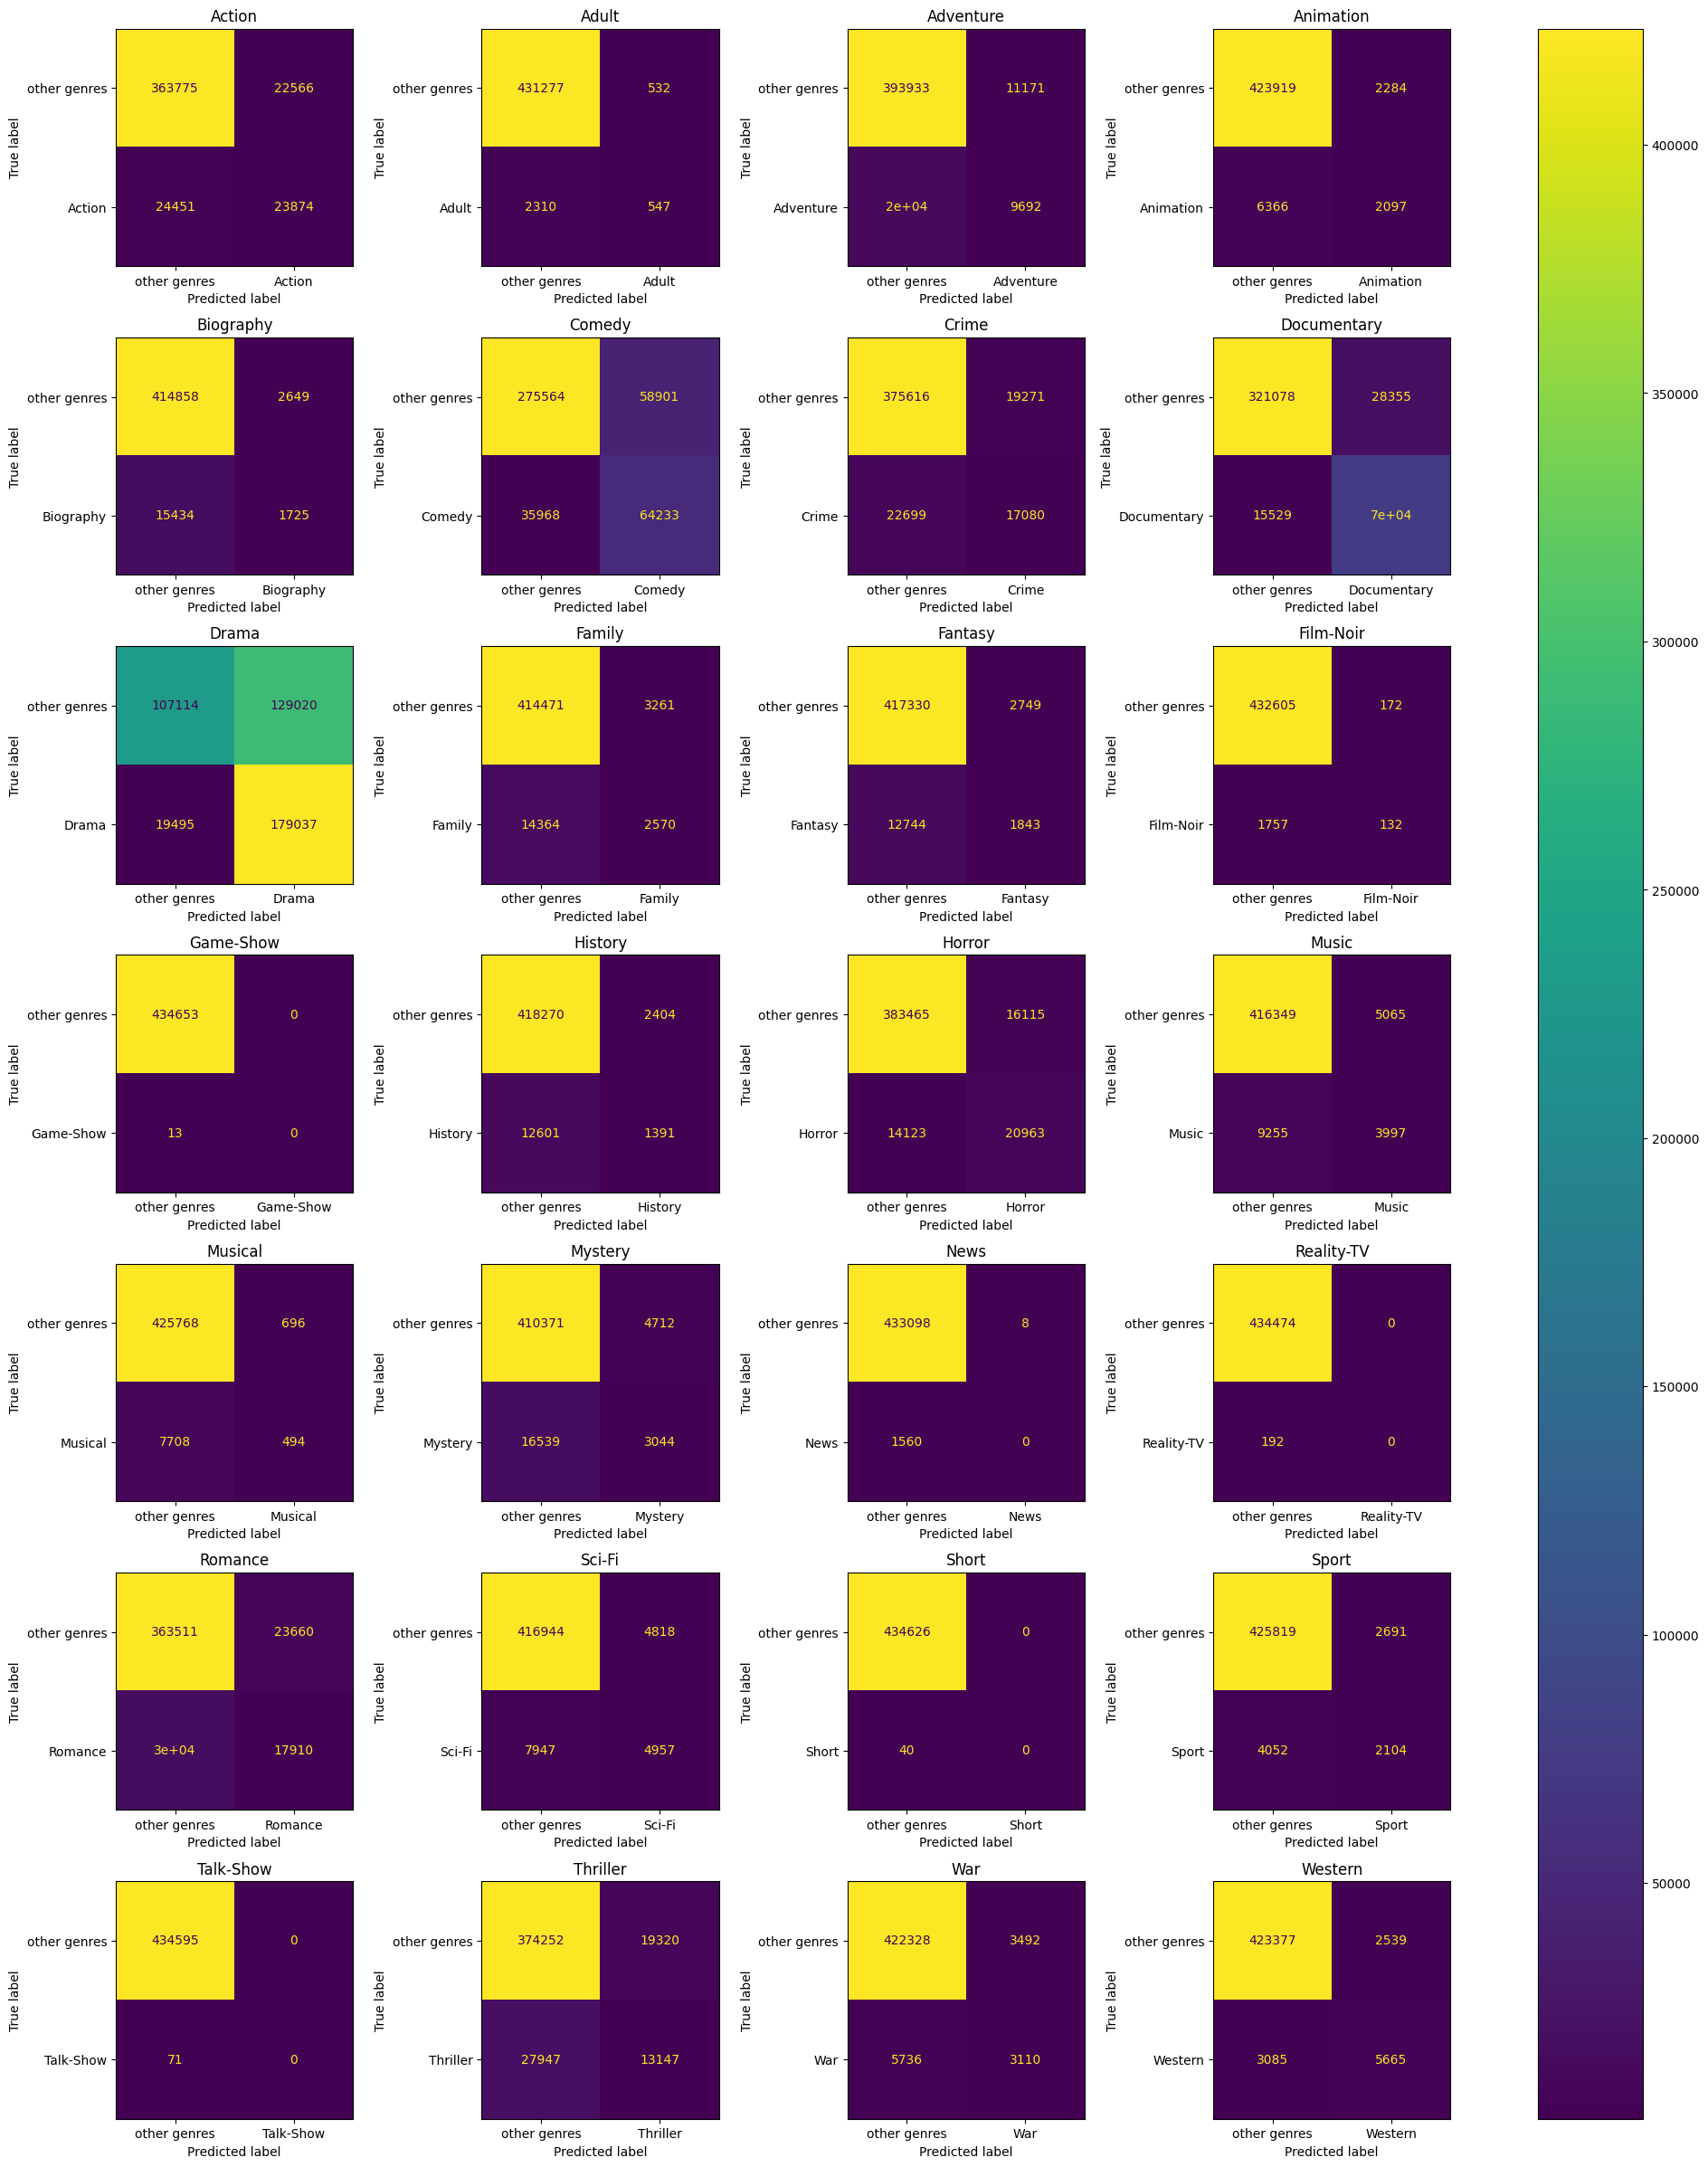

In [16]:
confusion_matrices = multilabel_confusion_matrix(y_test.tolist(), y_pred)
y_labels = pd.read_csv('data/preprocessed/binarization_classes.csv').Class.tolist()
fig, axes = plt.subplots(7, 4, figsize = (25, 30))
axes = axes.ravel()

for i, genre_confusion_matrix in enumerate(confusion_matrices):
    disp = ConfusionMatrixDisplay(genre_confusion_matrix, display_labels=['other genres', y_labels[i]])
    disp.plot(ax = axes[i], colorbar = False)
    disp.ax_.set_title(y_labels[i])
    
plt.subplots_adjust(hspace=0.3)
fig.colorbar(disp.im_, ax=axes)
plt.show()

Confusion matrix for the multi-label classification problem does not look like a typical confusion matrix. Byt anyway we can see that some genres are predicted better than others. If we look at the bottom row for each subplot we can find that genres that are more often presented in the dataset are usually predicted better, for example, Drama, Documentary, Comedy. And some genres that are almost never presented in the dataset, like Reality-TV or Short, never predicted correctly.

#### 2. Metrics and comparison to the baseline.

/home/jupyter-bastrich/venvs/uol-nlp/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


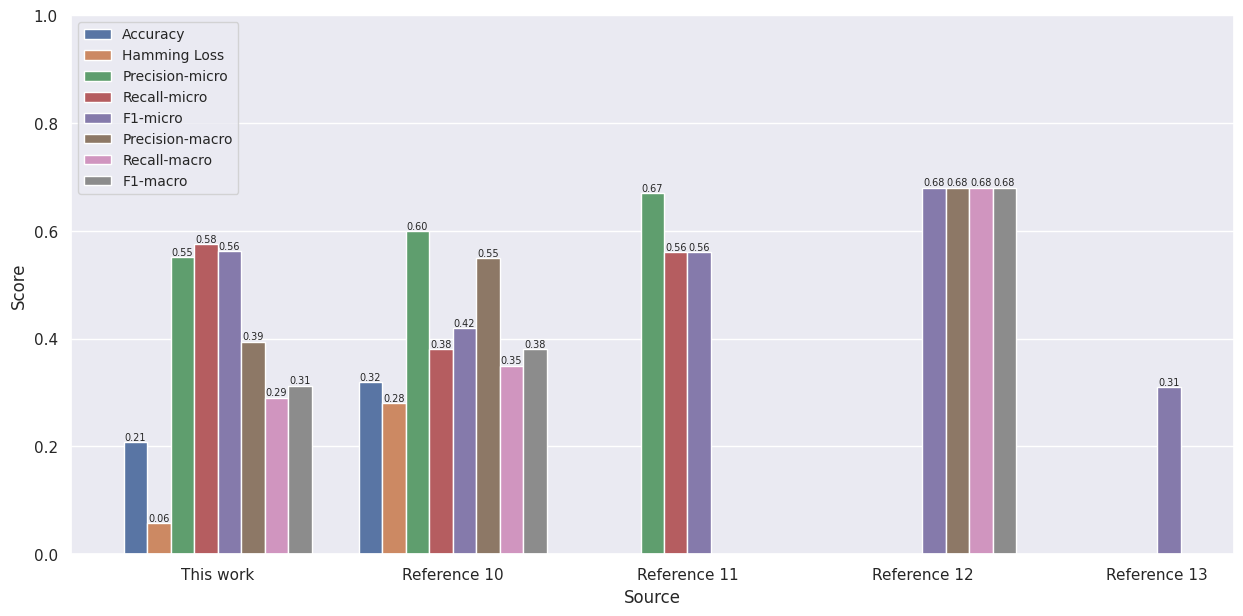

In [17]:
metrics_df = pd.DataFrame([
    {'Source': 'This work', 'Metrics': 'Accuracy', 
     'Score': accuracy_score(y_test.tolist(), y_pred.tolist())
    },
    {'Source': 'This work', 'Metrics': 'Hamming Loss', 
     'Score': hamming_loss(y_test.tolist(), y_pred.tolist())
    },
    {'Source': 'This work', 'Metrics': 'Precision-micro', 
     'Score': precision_score(y_test.tolist(), y_pred.tolist(), average = 'micro')
    },
    {'Source': 'This work', 'Metrics': 'Recall-micro', 
     'Score': recall_score(y_test.tolist(), y_pred.tolist(), average = 'micro')
    },
    {'Source': 'This work', 'Metrics': 'F1-micro', 
     'Score': f1_score(y_test.tolist(), y_pred.tolist(), average = 'micro')
    },
    {'Source': 'This work', 'Metrics': 'Precision-macro', 
     'Score': precision_score(y_test.tolist(), y_pred.tolist(), average = 'macro')
    },
    {'Source': 'This work', 'Metrics': 'Recall-macro', 
     'Score': recall_score(y_test.tolist(), y_pred.tolist(), average = 'macro')
    },
    {'Source': 'This work', 'Metrics': 'F1-macro', 
     'Score': f1_score(y_test.tolist(), y_pred.tolist(), average = 'macro')
    },


    {'Source': 'Reference 10', 'Metrics': 'Accuracy', 'Score': 0.32},
    {'Source': 'Reference 10', 'Metrics': 'Hamming Loss', 'Score': 0.28},
    {'Source': 'Reference 10', 'Metrics': 'Precision-micro', 'Score': 0.6},
    {'Source': 'Reference 10', 'Metrics': 'Recall-micro', 'Score': 0.38},
    {'Source': 'Reference 10', 'Metrics': 'F1-micro', 'Score': 0.42},
    {'Source': 'Reference 10', 'Metrics': 'Precision-macro', 'Score': 0.55},
    {'Source': 'Reference 10', 'Metrics': 'Recall-macro', 'Score': 0.35},
    {'Source': 'Reference 10', 'Metrics': 'F1-macro', 'Score': 0.38},

    # maximal score from each method
    {'Source': 'Reference 11', 'Metrics': 'Precision-micro', 'Score': 0.67},
    {'Source': 'Reference 11', 'Metrics': 'Recall-micro', 'Score': 0.56},
    {'Source': 'Reference 11', 'Metrics': 'F1-micro', 'Score': 0.56},

    {'Source': 'Reference 12', 'Metrics': 'Precision-macro', 'Score': 0.68},
    {'Source': 'Reference 12', 'Metrics': 'Recall-macro', 'Score': 0.68},
    {'Source': 'Reference 12', 'Metrics': 'F1-macro', 'Score': 0.68},
    {'Source': 'Reference 12', 'Metrics': 'F1-micro', 'Score': 0.68},

    {'Source': 'Reference 13', 'Metrics': 'F1-micro', 'Score': 0.31}
])

sns.set(rc={'figure.figsize':(15,7)})
ax = sns.barplot(x='Source', y='Score', hue='Metrics', data=metrics_df, width = 0.8)
ax.set(ylim=(0, 1))
ax.relim()
ax.autoscale_view()
ax.legend(loc='best', fontsize=10)
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', size = 7)

The only reference providing all the metrics we used in this work is Reference 10. Other references has less representation on the plot. We can see that we achieved pretty decent Hamming Loss comparing to Reference 10. Precision, Recall and F1-micro are comparable with baselines, though we use simpler classification methods.

#### 3. Metrics per genre

In [21]:
report = pd.DataFrame(
    classification_report(
        y_test.tolist(), 
        y_pred.tolist(), 
        target_names = \
            pd.read_csv('data/preprocessed/binarization_classes.csv')\
            .Class.tolist(), 
        output_dict = True
    )
)
report.T.sort_values('f1-score', ascending = False)

/home/jupyter-bastrich/venvs/uol-nlp/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jupyter-bastrich/venvs/uol-nlp/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
Documentary,0.710837,0.817805,0.760579,85233.0
Drama,0.581181,0.901804,0.706833,198532.0
Western,0.690517,0.647429,0.668279,8750.0
Horror,0.565376,0.597475,0.580982,35086.0
Comedy,0.521651,0.641042,0.575217,100201.0
samples avg,0.592334,0.633816,0.571101,780757.0
micro avg,0.550790,0.575488,0.562868,780757.0
weighted avg,0.525605,0.575488,0.529314,780757.0
Action,0.514083,0.494030,0.503857,48325.0
Crime,0.469863,0.429372,0.448706,39779.0


The top prediction results are achieved for Documentary, Drama, Western, Horror, Comedy and Action. All of those have a big number of samples in the dataset except Western and Horror. Perhpas the reason is that Western and Horror have more genre-specific words that uniquely identify them.

### 10. Summary and conclusions

The overall results do not look good globally. But in the context of the multi-label classification problem and comparing with other research papers in that directions the results seems to be not bad.
Espsecially considering the following factors:
1. The simpler model is used than in other worksю
2. Label imbalance was not considered and processed while other works usually reduce a number of genres to 5-10 of the most popular.

Hypothetically such a result has been achieved through not ideal but careful preprocessing. It can be improved if we process label imbalance, for example with manual filtering out a rare genres, or with approaches like SMOTE.

The results of this project can be used:
1. As a baseline for other projects.
2. For real contributions discussed in the Introduction section, or as a hepler tool for the same purposes. Though for lower real-time latency it has to be productionalized.

If we consider other domain-specific areas where we can benefit from text classification either from Mutliclass or from Multilabel classification, the ideas presented in this project are universal. They can be transfered and applied to any text classification problem while there are some text documents and predefined classes.

The Jypiter notebook can be easily run by anyone. All the data, initial and preserved on each step ara available by the reference [[14]](#14). AS long as Doc2Vec and MLP is supported or can be implemnted in a specific programming language and evironment, this project can be reproduced. For example, it may be Spark or R.

The alternative approaches worth consideration might be using BERT or GPT for vectorization, XGBoost or LSTM for classification. Perhaps One-Vs-Rest approach instead of native support fro Multilabel classification problem. Those are more modern approaches that can potentially show better performance but require deeper knowledge and more computational resources.

### IV. References
<a name="1" style="color: blue; font-size: 1.15em">[1] </a>IMDb Non-Commercial Datasets [Online]. Visited 2023, May 26. Available: [https://developer.imdb.com/non-commercial-datasets/](https://developer.imdb.com/non-commercial-datasets/)<br/>
<a name="2" style="color: blue; font-size: 1.15em">[2] </a>IMDb Title Basics Dataset [Online]. Visited 2023, May 26. Available: [https://datasets.imdbws.com/title.basics.tsv.gz](https://datasets.imdbws.com/title.basics.tsv.gz)<br/>
<a name="3" style="color: blue; font-size: 1.15em">[3] </a>IMDb Plot Summary Pages [Online]. Visited 2023, May 26. Available: [https://www.imdb.com/title/<title_id>/plotsummary/](https://www.imdb.com/title/<title_id>/plotsummary/)<br/>
<a name="4" style="color: blue; font-size: 1.15em">[4] </a>Pandas Documentation [Online]. Visited 2023, May 29. Available: [https://pandas.pydata.org/docs/](https://pandas.pydata.org/docs/)<br/>
<a name="5" style="color: blue; font-size: 1.15em">[5] </a>NumPy Documentation [Online]. Visited 2023, May 29. Available: [https://numpy.org/doc/](https://numpy.org/doc/)<br/>
<a name="6" style="color: blue; font-size: 1.15em">[6] </a>Matplotlib Documentation [Online]. Visited 2023, May 29. Available: [https://matplotlib.org/stable/index.html](https://matplotlib.org/stable/index.html)<br/>
<a name="7" style="color: blue; font-size: 1.15em">[7] </a>Seaborn Documentation [Online]. Visited 2023, May 29. Available: [https://seaborn.pydata.org/api.html](https://seaborn.pydata.org/api.html)<br/>
<a name="8" style="color: blue; font-size: 1.15em">[8] </a>Scikit-learn Documentation [Online]. Visited 2023, May 29. Available: [https://scikit-learn.org/stable/modules/classes.html](https://scikit-learn.org/stable/modules/classes.html)<br/>
<a name="9" style="color: blue; font-size: 1.15em">[9] </a>Doc2Vec Model [Online]. Visited 2023, June 3. Available: [https://radimrehurek.com/gensim/auto_examples/tutorials/run_doc2vec_lee.html](https://radimrehurek.com/gensim/auto_examples/tutorials/run_doc2vec_lee.html)<br/>
<a name="10" style="color: blue; font-size: 1.15em">[10] </a>Predicting Movie Genres Based on Plot Summaries [Online]. Visited 2023, May 27. Available: [https://medium.com/@kunalgupta4595/predicting-movie-genres-based-on-plot-summaries-bae646e70e04](https://medium.com/@kunalgupta4595/predicting-movie-genres-based-on-plot-summaries-bae646e70e04)<br/>
<a name="11" style="color: blue; font-size: 1.15em">[11] </a>Predicting Movie Genres Based on Plot Summaries [Online]. Visited 2023, May 27. Available: [https://arxiv.org/abs/1801.04813](https://arxiv.org/abs/1801.04813)<br/>
<a name="12" style="color: blue; font-size: 1.15em">[12] </a>Movie Genre Classification from Plot Summaries Using Bidirectional LSTM [Online]. Visited 2023, May 27. Available: [https://www.researchgate.net/publication/322929271_Movie_Genre_Classification_from_Plot_Summaries_Using_Bidirectional_LSTM](https://www.researchgate.net/publication/322929271_Movie_Genre_Classification_from_Plot_Summaries_Using_Bidirectional_LSTM)<br/>
<a name="13" style="color: blue; font-size: 1.15em">[13] </a>Movie Genre Prediction Based on Plot Synopsis [Online]. Visited 2023, May 27. Available: [https://www.academia.edu/44569535/Movie_Genre_Prediction_Based_on_Plot_Synopsis](https://www.academia.edu/44569535/Movie_Genre_Prediction_Based_on_Plot_Synopsis)<br/>